<div style="background-color: #008B8B; padding: 15px; border-radius: 5px; font-size: 28px; color: black; font-weight: bold;">
Toy pour coûts projet
</div>

<div style="background-color: #008B8B; padding: 15px; border-radius: 5px; font-size: 28px; color: black; font-weight: bold;">
Le modèle...
</div>

Projet type "IA" avec MaD, IRT, pas d'achat.

Apports industriels:
- MaD ($MAD$): salaires bruts chargés Mis à Disposition
- Cash Indusriel ($C_{ind}$) : apport cash industriel
- on pose $\alpha = \frac{C_{ind}}{MAD}$

Ressources projet:
- $MAD$ : facturation IRT vers Industriels leur MàD
- $C_{ind}$ : apport cash
- $F_{2030}$ : France 2030
avec $F_{2030} = \frac{60+40}{60}(MAD + C_{ind}) = \frac{1}{0,6}(MAD + C_{ind})$

Dépenses projet:
- $MAD_i$ : coûts MaD avec indirects : $MAD_i = MAD \times 1,52$
- $IRT_i$ : coût IRT avec indirects : $IRT_i = IRT \times 1,52$
- on pose $\beta = \frac{IRT}{MAD}$ : rapport ressources (salaires) IRT vs ressources (salaires) MàD

Reste à Charge:
\begin{align}
RaC &= (MAD + C_{ind} + F_{2030}) - (MAD + IRT) \times 1,52 \\
&= MAD \left( \frac{1 + \alpha}{0,6} \right) - MAD \left((1 + \beta) \times 1,52 \right) \\
&= MAD \left( \frac{5}{3}(1+\alpha) - (1+\beta) \times 1,52 \right) \\
&= MAD \left( 0,147 + 1,67 \alpha - 1,52 \beta \right) \\
\frac{RaC}{MAD} &= 0,147 + 1,67 \alpha - 1,52 \beta
\end{align} 

<div style="background-color: #008B8B; padding: 15px; border-radius: 5px; font-size: 28px; color: black; font-weight: bold;">
Les conséquences
</div>

$RaC > 0 \iff \alpha > \frac{1,52 \beta - 0,147}{1,67} = 0,910 \beta - 0,088 $

In [9]:
import numpy as np
import matplotlib.pyplot as plt

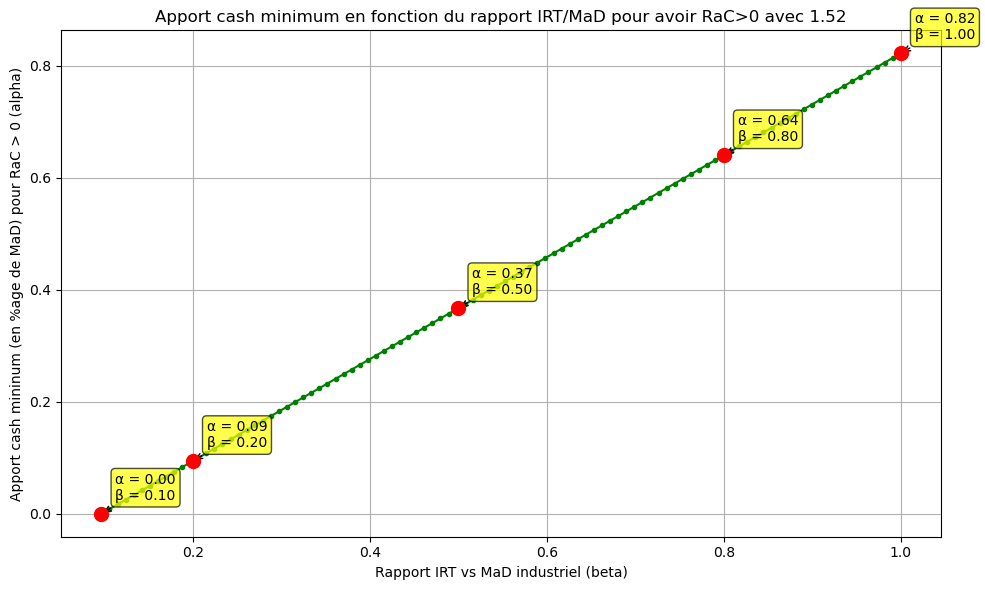

In [ ]:
fig, ax = plt.subplots(figsize=(10,6))

def rac_pos(beta):
    return 0.910 * beta - 0.088

betas = np.linspace(0.088/0.910, 1.0, 100)
alphas_min = rac_pos(betas)
ax.plot(betas, alphas_min, marker='.', color='green')

# Points of interest
interesting_betas = [0.088/0.910, 0.2, 0.5, 0.8, 1.0]
interesting_alphas = [rac_pos(beta) for beta in interesting_betas]

# Add scatter points
ax.scatter(interesting_betas, interesting_alphas, color='red', s=100, zorder=5)

# Add annotations
annotations = [
    (interesting_alphas[i], interesting_betas[i], f'α = {interesting_alphas[i]:.2f}\nβ = {interesting_betas[i]:.2f}') for i in range(len(interesting_alphas))
]

for alpha, beta, text in annotations:
    ax.annotate(text, (beta, alpha), 
                xytext=(10, 10), textcoords='offset points',
                bbox=dict(boxstyle='round,pad=0.3', facecolor='yellow', alpha=0.7),
                arrowprops=dict(arrowstyle='->', connectionstyle='arc3,rad=0'))

ax.set_xlabel(f'Rapport IRT vs MaD industriel (beta)')
ax.set_ylabel(f'Apport cash mininum (en %age de MaD) pour RaC > 0 (alpha)')
ax.grid()
ax.set_title('Apport cash minimum en fonction du rapport IRT/MaD pour avoir RaC>0 avec 1.52')

plt.tight_layout()
plt.show()

Exemple :
- si on veut autant d'IRT sur le projet que de MaD, $\beta=1$, donc $\alpha = 0.82$. L'apport cash de l'industriel doit être égal à 82% de la MaD.
- si on veut 1 IRT pour 2 MaD, $\beta=0.50$, donc $\alpha = 0.37$. L'apport cash de l'industriel doit être égal à 37% de la MaD.